In [59]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

In [93]:
S = np.random.rand(1000,3)
T = np.random.rand(1000,3)

In [94]:
A = cp.Variable((S.shape[0],S.shape[0]))

err = cp.sum(cp.norm(A@S-T))
# err = cp.sum([cp.sum_squares(A@S[:,i]-T[:,i]) for i in range(S.shape[0])])

problem = cp.Problem(cp.Minimize(err))

problem.solve(verbose=True)

                                     CVXPY                                     
                                     v1.3.0                                    
(CVXPY) Apr 28 02:53:27 PM: Your problem has 1000000 variables, 0 constraints, and 0 parameters.
(CVXPY) Apr 28 02:53:27 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Apr 28 02:53:27 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Apr 28 02:53:27 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Apr 28 02:53:27 PM: Compiling problem (target solver=SCS).
(CVXPY) Apr 28 02:53:27 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffin

8.626265094036177e-07

In [56]:
A.value@S

array([[0.99945792, 0.13114898, 0.25597895],
       [0.84668797, 0.97033242, 0.68221826],
       [0.69395897, 0.29890686, 0.69368711],
       ...,
       [0.081795  , 0.0427222 , 0.13220115],
       [0.80911046, 0.07347974, 0.93879725],
       [0.57481416, 0.32220805, 0.94739868]])

In [55]:
T

array([[0.99945795, 0.13114898, 0.25597896],
       [0.846688  , 0.97033245, 0.68221828],
       [0.69395899, 0.29890686, 0.69368713],
       ...,
       [0.081795  , 0.04272221, 0.13220115],
       [0.80911049, 0.07347975, 0.93879728],
       [0.57481418, 0.32220806, 0.94739871]])

# Visualize a 2D example

In [253]:
def generate_clusters(n_clusters,n_points_per_cluster,mean_range,std_dev_range):
    clusters = []
    for i in range(n_clusters):
        cluster_mean = np.random.uniform(-mean_range,mean_range,size=3)
        cluster_std_dev = np.random.uniform(0,std_dev_range)
        cluster_points = np.random.normal(loc=cluster_mean,scale=cluster_std_dev,size=(n_points_per_cluster,3))
        clusters.append(cluster_points)
    return np.vstack(clusters)

S = generate_clusters(n_clusters=3,n_points_per_cluster=20,mean_range=30,std_dev_range=6)
T = generate_clusters(n_clusters=3,n_points_per_cluster=20,mean_range=30,std_dev_range=2)

In [254]:
A = cp.Variable((S.shape[1],S.shape[1]))

err = cp.sum(cp.norm(A@S.T-T.T))
# err = cp.sum([cp.sum_squares(A@S[:,i]-T[:,i]) for i in range(S.shape[0])])

problem = cp.Problem(cp.Minimize(err))

problem.solve(verbose=False)

109.96516038091023

In [72]:
%matplotlib widget

In [255]:
T_tilde = A.value@S.T

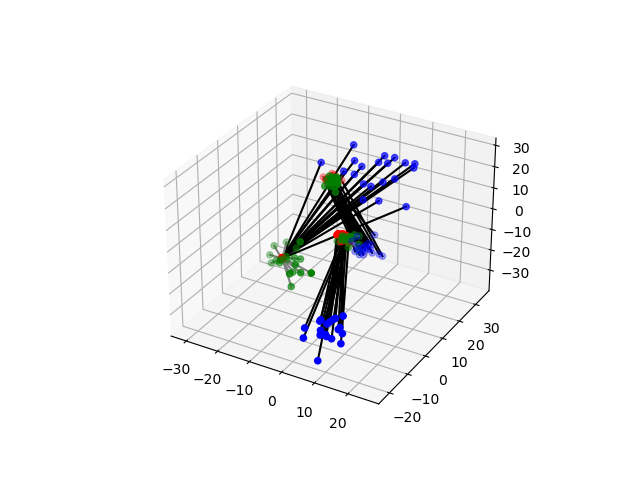

In [256]:
ax = plt.figure().add_subplot(projection='3d')
for i in range(3):
    ax.scatter3D(S[i*20:(i+1)*20,0],S[i*20:(i+1)*20,1],S[i*20:(i+1)*20,2],c='b',alpha=(i+1)/3)
    # ax.scatter3D(S[20:,0],S[20:,1],S[20:,2],c='b',alpha=0.25)
    ax.scatter3D(T[i*20:(i+1)*20,0],T[i*20:(i+1)*20,1],T[i*20:(i+1)*20,2],c='r',alpha=(i+1)/3)
# ax.scatter3D(T[20:,0],T[20:,1],T[20:,2],c='r',alpha=0.25)
ax.scatter3D(T_tilde[0,:],T_tilde[1,:],T_tilde[2,:],c='g')
for i in range(S.shape[0]):
    ax.plot3D([S[i,0],T[i,0]],[S[i,1],T[i,1]],[S[i,2],T[i,2]],c='k')
    ax.plot3D([T[i,0],T_tilde[0,i]],[T[i,1],T_tilde[1,i]],[T[i,2],T_tilde[2,i]],c='gray')
plt.show()